## Importing Libraries 

In [2]:
import pandas as pd
import tensorflow as tf
import folderstats
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

## Downloading Project DataSet

In [3]:
#!git clone https://github.com/Franck-Dernoncourt/pubmed-rct # Downloading DataSet

In [4]:
ls pubmed-rct/

PubMed_200k_RCT/
PubMed_200k_RCT_numbers_replaced_with_at_sign/
PubMed_20k_RCT/
PubMed_20k_RCT_numbers_replaced_with_at_sign/
README.md


## Project Details

In [5]:
from IPython.display import Markdown, display

display(Markdown('pubmed-rct/README.md'))


# PubMed 200k RCT dataset

The PubMed 200k RCT dataset is described in *Franck Dernoncourt, Ji Young Lee. [PubMed 200k RCT: a Dataset for Sequential Sentence Classification in Medical Abstracts](https://arxiv.org/abs/1710.06071). International Joint Conference on Natural Language Processing (IJCNLP). 2017.*

Abstract:

> PubMed 200k RCT is new dataset based on PubMed for sequential sentence classification. The dataset consists of approximately 200,000 abstracts of randomized controlled trials, totaling 2.3 million sentences. Each sentence of each abstract is labeled with their role in the abstract using one of the following classes: background, objective, method, result, or conclusion. The purpose of releasing this dataset is twofold. First, the majority of datasets for sequential short-text classification (i.e., classification of short texts that appear in sequences) are small: we hope that releasing a new large dataset will help develop more accurate algorithms for this task. Second, from an application perspective, researchers need better tools to efficiently skim through the literature. Automatically classifying each sentence in an abstract would help researchers read abstracts more efficiently, especially in fields where abstracts may be long, such as the medical field.


Some miscellaneous information:
- PubMed 20k is a subset of PubMed 200k. I.e., any abstract present in PubMed 20k is also present in PubMed 200k. 
- `PubMed_200k_RCT` is the same as `PubMed_200k_RCT_numbers_replaced_with_at_sign`, except that in the latter all numbers had been replaced by `@`. (same for `PubMed_20k_RCT` vs. `PubMed_20k_RCT_numbers_replaced_with_at_sign`).
- Since Github file size limit is [100 MiB](https://stackoverflow.com/a/43098961/395857), we had to compress `PubMed_200k_RCT\train.7z` and `PubMed_200k_RCT_numbers_replaced_with_at_sign\train.zip`. To uncompress `train.7z`, you may use [7-Zip](http://www.7-zip.org/download.html) on Windows,  [Keka](http://www.kekaosx.com/en/) on Mac OS X, or [p7zip](http://p7zip.sourceforge.net/) on Linux.

You are most welcome to share with us your analyses or work using this dataset!

## Projects using the PubMed 200k RCT dataset

- Titipat Achakulvisut, Chandra Bhagavatula, Daniel E Acuna, Konrad P Kording. [Claim Extraction for Scientific Publications](https://github.com/titipata/detecting-scientific-claim). 2018


In [6]:
folderstats.folderstats('pubmed-rct/').sort_values('size', ascending=False).head(6)

,id,path,name,extension,size,atime,mtime,ctime,folder,num_files,depth,parent,uid
59,1,pubmed-rct/,,None,449322483,2022-02-02 22:59:21,2022-02-02 22:59:20,2022-02-02 22:59:20,True,39.0,0,0,501
54,15,pubmed-rct/.git,.git,None,185711302,2022-02-02 22:59:21,2022-02-02 22:59:20,2022-02-02 22:59:20,True,26.0,1,1,501
18,17,pubmed-rct/.git/objects,objects,None,185683049,2022-02-02 22:59:14,2022-02-02 22:59:13,2022-02-02 22:59:13,True,2.0,2,15,501
16,18,pubmed-rct/.git/objects/pack,pack,None,185682857,2022-02-02 22:59:20,2022-02-02 22:59:20,2022-02-02 22:59:20,True,2.0,3,17,501
15,20,pubmed-rct/.git/objects/pack/pack-a718c4f14679...,pack-a718c4f14679a5db0d6080d1544682fb14e154c4,pack,185680861,2022-02-02 22:59:20,2022-02-02 22:59:20,2022-02-02 22:59:20,False,NaN,3,18,501
8,7,pubmed-rct/PubMed_200k_RCT_numbers_replaced_wi...,PubMed_200k_RCT_numbers_replaced_with_at_sign,None,109467967,2022-02-02 22:59:21,2022-02-02 22:59:20,2022-02-02 22:59:20,True,3.0,1,1,501


In [7]:
ls pubmed-rct/PubMed_20k_RCT/

dev.txt    test.txt   train.txt


In [8]:
data_dir = 'pubmed-rct/PubMed_20k_RCT/'


In [9]:
import os
filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['pubmed-rct/PubMed_20k_RCT/dev.txt',
 'pubmed-rct/PubMed_20k_RCT/train.txt',
 'pubmed-rct/PubMed_20k_RCT/test.txt']

## Sample Data 

In [10]:
# Links to the document
data_dir_1 =  'pubmed-rct/PubMed_20k_RCT/train.txt'
data_dir_1_test =  'pubmed-rct/PubMed_20k_RCT/test.txt'
data_dir_2 =  'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt'
data_dir_2_test =  'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt'

In [11]:
# Reading the Datasets
def read_lines(filepath):
    with open(filepath) as f:
        return f.readlines()

#### - Raw Data

In [12]:
read_lines(data_dir_1)[:10] # Reading the first 10 lines from the raw data 


['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of 6 weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at 12 weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of 125 patients with primary knee OA were randomized 1:1 ; 63 received 7.5 mg/day of prednisolone and 62 received placebo for 6 weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( 0-100 mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and 6-min walk distance ( 6MWD ) .\n',
 'METHODS\tSerum levels of interleukin 1 ( IL-1 ) , IL-6 , tumor necrosis factor ( TNF )

#### - Partly Clean Data

In [13]:
read_lines(data_dir_2)[:10] # Reading the first 10 lines from the partly clean data 

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

## Preprocessing Text From Document

In [14]:
def preprocess_text(filename):
    """
    This function is used to preprocess text from the document and used to assign different sub heading to each of their headers
    """
    
    df_dict = {} 
    lines_list =[]
    abstract_lines = ''
    k = 0
    input_lines = read_lines(filename)

    for line in input_lines:
        if line.startswith('###'):
            abstract_id = line 
            abstract_lines = ''
        elif line.isspace():
            abstract_line_split = abstract_lines.splitlines()

            for newlinenumber, newline in enumerate(abstract_line_split):
                line_data = {}
                target_text_split = newline.split('\t')
                line_data['target'] = target_text_split[0]
                line_data['text'] = target_text_split[1]
                line_data['line_number'] = newlinenumber
                line_data['total_lines'] = len(abstract_line_split) - 1
                lines_list.append(line_data)
        else:
            abstract_lines += line

    return lines_list

> Importing the preprocessed data

There are two preprocessed data as supplied in the paper. One of them was supplied partly clean without numbers. There is one imported from raw data.

In [15]:
training_data  =  pd.DataFrame(preprocess_text(data_dir_1)) #loading Training Data from raw data 
training_data_without_numbers  =  pd.DataFrame(preprocess_text(data_dir_2)) #loading Training Data from half clean data 

In [16]:
test_data  =  pd.DataFrame(preprocess_text(data_dir_1_test)) #loading test Data from raw data
test_data_without_numbers  =  pd.DataFrame(preprocess_text(data_dir_2_test)) #loading test Data from half clean data 

### Disribution of Document Parts

Text(0.5, 1.0, 'Number of Samples')

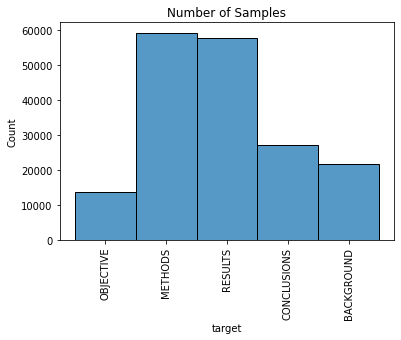

In [17]:
import matplotlib.pyplot as plt
sns.histplot(training_data['target']) 
plt.xticks(rotation=90)
plt.title('Number of Samples')

#### Splitting Datasets into training and Validation Parts

In [18]:
training_dataset, validation_dataset = train_test_split(training_data)


In [19]:
training_dataset

,target,text,line_number,total_lines
60888,RESULTS,The average and minimum oxygen saturation valu...,5,9
174484,METHODS,The participants with mild to moderate depress...,2,9
55297,METHODS,Random assignment ( by a validated computer-ba...,5,20
76094,CONCLUSIONS,The preperitoneal mesh placement during the re...,9,9
151967,BACKGROUND,NCT00486629 .,11,11
...,...,...,...,...
121430,METHODS,A tertiary centre for recurrent miscarriage in...,2,9
168862,RESULTS,NASH resolution was associated with significan...,8,13
84236,METHODS,This study is registered with ClinicalTrials.g...,11,19
165748,METHODS,Homogenates of esophageal biopsy specimens fro...,5,19


#### Encoding Document Label (Targets) & Seperating Features

In [20]:

lb_encoder = LabelEncoder()
y_train   = lb_encoder.fit_transform(training_data[['target']]) # Training Labels Using Label Encoder
X_train = training_data['text'] # Training Features Seperation


y_test   = lb_encoder.transform(test_data['target']) # Test Labels Using Label Encoder
X_test = test_data['text'] # Test Features Seperation


/Users/yaqoobao/Downloads/venv/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
y_train

array([3, 2, 2, ..., 4, 1, 1])

## Model Experimentation

#### Baseline Model Using MultinomialNB & TextVectorizer

I decide to use `MultinomialNB` from sklearn as my Baseline Model. 

In [22]:
# Building TFDF model Pipeline

Tfdf_model  = Pipeline([
    ('TextVectorizer', TfidfVectorizer()), # Vectorizing The Text
    ('clf', MultinomialNB()) # Building a Multinomial NB Model
]) # Building Model Pipeline

Tfdf_model.fit(X_train, y_train ) # Fitting Model

Pipeline(steps=[('TextVectorizer', TfidfVectorizer()),
                ('clf', MultinomialNB())])

In [23]:
Tfdf_model.score(X_test, y_test) # Evaluating model

0.7265637962502074

In [24]:
y_pred = Tfdf_model.predict(X_test) # Prediction the test data

In [25]:
from YaqoobFunctions import performance_measure_classification, plot_curve # Importing the performance calculation & plot curve code from my py file

In [26]:
performance_measure_classification(y_pred, y_test, model_name='MultinomalNB Baseline Model') 

,accuracy,cohen_kappa_score,recall,precision,f1
MultinomalNB Baseline Model,0.726564,0.619929,0.726564,0.798564,0.753738


## DEEP LEARNING APPROACH

Data Exploration

In [27]:
len_of_tokens = [len(i) for i in (training_data['text'].str.split())] 
    

In [28]:
'Each sentence has an average of {} words'.format(round(sum(len_of_tokens)/ len(len_of_tokens)))

'Each sentence has an average of 26 words'

/Users/yaqoobao/Downloads/venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of number of words per sentence')

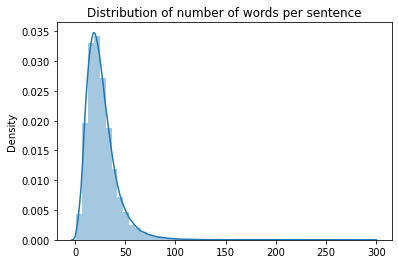

In [29]:
sns.distplot(len_of_tokens)
plt.title('Distribution of number of words per sentence')

The distibution of the number of tokens per row show that there are around 25 words per sentences, In some extreme case of around 300 words 

In [30]:
import numpy as np
np.percentile(len_of_tokens, 95)

55.0

95% of the samples have less than 55 words

In [31]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.layers import Embedding
text_vectorizer = TextVectorization(
    max_tokens=68000, # given in paper 
    output_sequence_length = int(np.percentile(len_of_tokens, 95)) # per example
)
text_vectorizer.adapt(training_data['text'])
token_embed = Embedding(input_dim=len(text_vectorizer.get_vocabulary()), 
                        output_dim=128,
                        name='Embedding_Layer') # Data embedding

2022-02-09 12:40:07.118707: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-09 12:40:07.118849: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-02-09 12:40:07.165701: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-02-09 12:40:07.205914: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



#### Preprocessing And Re-Creating Datasets Using Tf.Data.API

In [32]:
ohe = OneHotEncoder(sparse=False)
training_labels   = ohe.fit_transform(training_dataset['target'].to_numpy().reshape(-1,1))  # Training Labels Using One Hot Encoding
training_dataset = training_dataset[['text']] # Training Features Seperation
tf_train_dataset = tf.data.Dataset.from_tensor_slices((training_dataset,training_labels ))
tf_train_dataset = tf_train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

def prepare_data(ohe, dataset, target_column, feature_columns):
    '''
    This function is used to prepare the dataset for a very efficient experience during the training and test
    '''
    labels = ohe.transform(dataset[target_column].to_numpy().reshape(-1,1)) #One Hot Encoding
    tf_dataset =  tf.data.Dataset.from_tensor_slices((dataset[feature_columns],labels ))
    return tf_dataset.batch(32).prefetch(tf.data.AUTOTUNE) # prefetch and batch data for optimal performance


tf_testing_dataset = prepare_data(ohe, test_data, 'target', ['text'])
tf_validation_dataset = prepare_data(ohe, validation_dataset, 'target', ['text'])

### Model Experiment

#### Conv1D Model Experiment

In [33]:
tf_validation_dataset
inputs =  tf.keras.layers.Input(shape=(1,), dtype=tf.string) 
text_vectors = text_vectorizer(inputs)
token_embeddings = token_embed(text_vectors)
x = tf.keras.layers.Conv1D(64, kernel_size=5, activation='relu')(token_embeddings)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
outputs =tf.keras.layers.Dense(5, activation='softmax')(x)
Conv1D_Model = tf.keras.Model(inputs, outputs)

Conv1D_Model.compile(metrics =['accuracy'], 
                    loss='categorical_crossentropy', 
                    optimizer='Adam')

##### Plotting the Conv1D Model

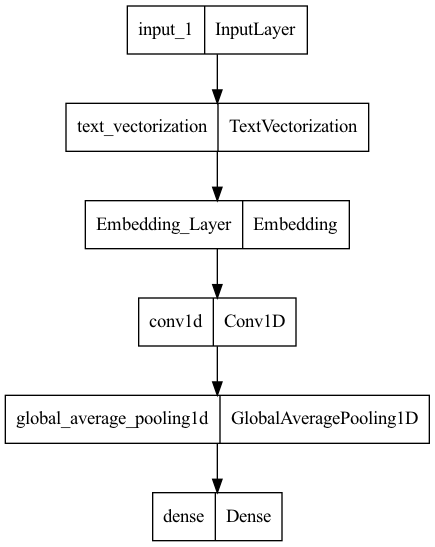

In [34]:
from tensorflow.keras.utils import plot_model
plot_model(Conv1D_Model)

In [35]:
Conv1D_Model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 55)               0         
 torization)                                                     
                                                                 
 Embedding_Layer (Embedding)  (None, 55, 128)          8704000   
                                                                 
 conv1d (Conv1D)             (None, 51, 64)            41024     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 5)                 325   

In [36]:

History = Conv1D_Model.fit(tf_train_dataset, 
                                                        steps_per_epoch=int(0.15 *len(tf_train_dataset)),
                                                        validation_data=tf_validation_dataset,
                                                        validation_steps=int(0.15 * len(tf_validation_dataset)),
                                                         epochs=5)

Epoch 1/5


2022-02-09 12:40:11.838509: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


633/633 [==============================] - ETA: 0s - loss: 0.8897 - accuracy: 0.6497

2022-02-09 12:40:25.273031: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


633/633 [==============================] - 15s 23ms/step - loss: 0.8897 - accuracy: 0.6497 - val_loss: 0.6908 - val_accuracy: 0.7294
Epoch 2/5
633/633 [==============================] - 14s 22ms/step - loss: 0.6680 - accuracy: 0.7456 - val_loss: 0.6281 - val_accuracy: 0.7650
Epoch 3/5
633/633 [==============================] - 14s 22ms/step - loss: 0.6224 - accuracy: 0.7735 - val_loss: 0.5878 - val_accuracy: 0.7903
Epoch 4/5
633/633 [==============================] - 14s 22ms/step - loss: 0.5832 - accuracy: 0.7884 - val_loss: 0.5737 - val_accuracy: 0.7924
Epoch 5/5
633/633 [==============================] - 14s 22ms/step - loss: 0.5675 - accuracy: 0.7986 - val_loss: 0.5531 - val_accuracy: 0.8014


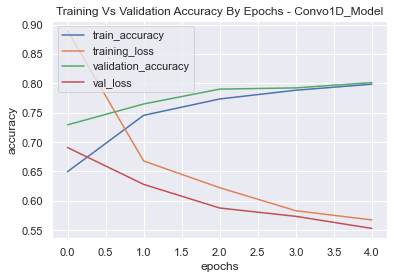

In [37]:
sns.set()
plot_curve(History, 'Convo1D_Model')

In [38]:
tf.argmax(Conv1D_Model.predict(tf_testing_dataset), axis=1)

2022-02-09 12:41:21.309297: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


<tf.Tensor: shape=(30135,), dtype=int64, numpy=array([0, 2, 2, ..., 4, 4, 4])>

In [39]:
performance_measure_classification(tf.argmax(Conv1D_Model.predict(tf_testing_dataset), axis=1), y_test, 'Conv1D' )

,accuracy,cohen_kappa_score,recall,precision,f1
Conv1D,0.797876,0.726524,0.797876,0.810458,0.801136


#### Conv1D Model Using Transfer learning (Universal Sentence Encoder)

In [40]:
import tensorflow_hub as hub

Use_embed_V3 = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder-large/5") # importing the version 5 of USE



2022-02-09 12:41:40.917245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [41]:
tf_validation_dataset
inputs =  tf.keras.layers.Input(shape=[], dtype=tf.string) 
token_embeddings = Use_embed_V3(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(token_embeddings)
outputs =tf.keras.layers.Dense(5, activation='softmax')(x)
Conv1D_Model_USE_V3 = tf.keras.Model(inputs, outputs)
Conv1D_Model_USE_V3.compile(metrics =['accuracy'], loss='categorical_crossentropy', optimizer='Adam')

In [42]:
Conv1D_Model_USE_V3.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 keras_layer (KerasLayer)    (None, 512)               147354880 
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 5)                 645       
                                                                 
Total params: 147,421,189
Trainable params: 66,309
Non-trainable params: 147,354,880
_________________________________________________________________


In [43]:
History_Conv1D_Model_USE_V3 = Conv1D_Model_USE_V3.fit(tf_train_dataset, 
                                                        steps_per_epoch=int(0.15 *len(tf_train_dataset)),
                                                        validation_data=tf_validation_dataset,
                                                        validation_steps=int(0.15 * len(tf_validation_dataset)),
                                                         epochs=5)

Epoch 1/5


2022-02-09 12:41:53.028031: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


633/633 [==============================] - ETA: 0s - loss: 0.7753 - accuracy: 0.7112

2022-02-09 12:45:27.172890: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


633/633 [==============================] - 313s 477ms/step - loss: 0.7753 - accuracy: 0.7112 - val_loss: 0.6528 - val_accuracy: 0.7568
Epoch 2/5
633/633 [==============================] - 381s 602ms/step - loss: 0.6327 - accuracy: 0.7646 - val_loss: 0.6152 - val_accuracy: 0.7741
Epoch 3/5
633/633 [==============================] - 436s 690ms/step - loss: 0.6099 - accuracy: 0.7742 - val_loss: 0.5936 - val_accuracy: 0.7810
Epoch 4/5
633/633 [==============================] - 474s 749ms/step - loss: 0.5887 - accuracy: 0.7817 - val_loss: 0.5773 - val_accuracy: 0.7878
Epoch 5/5
633/633 [==============================] - 496s 783ms/step - loss: 0.5769 - accuracy: 0.7816 - val_loss: 0.5786 - val_accuracy: 0.7855


In [44]:
tf_train_dataset = tf.data.Dataset.from_tensor_slices((training_dataset,training_labels ))
tf_train_dataset = tf_train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

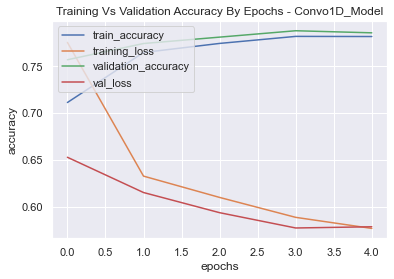

In [45]:
plot_curve(History_Conv1D_Model_USE_V3, 'Convo1D_Model')

In [46]:

performance_measure_classification(tf.argmax(Conv1D_Model_USE_V3.predict(tf_testing_dataset), axis=1), y_test, 'Conv1D_Model_USE_V3' )

2022-02-09 13:16:45.223165: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


,accuracy,cohen_kappa_score,recall,precision,f1
Conv1D_Model_USE_V3,0.783408,0.707456,0.783408,0.791442,0.785711


#### Conv1D Model Using Character-Level Embedding

In [47]:
def split_word_to_letter(text):
    return " ".join(text)

In [48]:
training_data['text_char_level'] = [split_word_to_letter(sentence) for sentence in training_data['text']]
validation_dataset['text_char_level'] = [split_word_to_letter(sentence) for sentence in validation_dataset['text']]
test_data['text_char_level'] = [split_word_to_letter(sentence) for sentence in test_data['text']]


In [49]:
import string
all_alphabets = string.ascii_lowercase + string.digits + string.punctuation # All Alphabets
len(all_alphabets)

68

In [50]:
training_data

tf_training_data_char = prepare_data(ohe, training_data, 'target', ['text_char_level'])
tf_validation_data_char = prepare_data(ohe, validation_dataset, 'target', ['text_char_level'])
tf_test_data_char = prepare_data(ohe, test_data, 'target', ['text_char_level'])

In [51]:
NUM_CHAR_TOKENS = len(all_alphabets) + 2 
char_vectorizer = TextVectorization(max_tokens=NUM_CHAR_TOKENS, output_sequence_length=290, name='char_vectorizer')
char_vectorizer.adapt(training_data['text_char_level'])
char_vectorizer_embed = Embedding(input_dim=len(char_vectorizer.get_vocabulary()), 
                        output_dim=25, #As requested in the paper
                        mask_zero=True,
                        name='Embedding_Layer')

char_vectorizer(training_data['text_char_level'])

2022-02-09 13:25:26.993828: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


<tf.Tensor: shape=(180040, 290), dtype=int64, numpy=
array([[ 3,  7,  4, ...,  0,  0,  0],
       [ 5,  3,  7, ...,  0,  0,  0],
       [ 7, 16,  3, ...,  0,  0,  0],
       ...,
       [22,  7,  3, ...,  0,  0,  0],
       [11,  7, 15, ...,  0,  0,  0],
       [14, 12,  5, ...,  0,  0,  0]])>

In [52]:
char_vectorizer_embed(char_vectorizer(training_data['text_char_level'][1])).shape

TensorShape([290, 25])

In [53]:
inputs =  tf.keras.layers.Input(shape=(1,), dtype=tf.string) 
text_vectors = char_vectorizer(inputs)
token_embeddings = char_vectorizer_embed(text_vectors)
x = tf.keras.layers.Conv1D(64, kernel_size=5, activation='relu')(token_embeddings)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
outputs =tf.keras.layers.Dense(5, activation='softmax')(x)
Conv1D_Model_Char = tf.keras.Model(inputs, outputs)

Conv1D_Model_Char.compile(metrics =['accuracy'], 
                    loss='categorical_crossentropy', 
                    optimizer='Adam')

In [54]:
Conv1D_Model_Char.fit(tf_training_data_char, validation_data=tf_validation_data_char, epochs=5)

Epoch 1/5


2022-02-09 13:25:33.710930: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5627/5627 [==============================] - ETA: 0s - loss: 1.2085 - accuracy: 0.5069

2022-02-09 13:28:50.621166: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5627/5627 [==============================] - 212s 38ms/step - loss: 1.2085 - accuracy: 0.5069 - val_loss: 1.1513 - val_accuracy: 0.5349
Epoch 2/5
5627/5627 [==============================] - 210s 37ms/step - loss: 1.1190 - accuracy: 0.5481 - val_loss: 1.0859 - val_accuracy: 0.5595
Epoch 3/5
5627/5627 [==============================] - 210s 37ms/step - loss: 1.0524 - accuracy: 0.5740 - val_loss: 1.0229 - val_accuracy: 0.5871
Epoch 4/5
5627/5627 [==============================] - 208s 37ms/step - loss: 0.9927 - accuracy: 0.6028 - val_loss: 0.9717 - val_accuracy: 0.6141
Epoch 5/5
5627/5627 [==============================] - 210s 37ms/step - loss: 0.9418 - accuracy: 0.6284 - val_loss: 0.9244 - val_accuracy: 0.6373


In [55]:
performance_measure_classification(tf.argmax(Conv1D_Model_Char.predict(tf_test_data_char), axis=1), y_test, 'Conv1D_Model_Char' )

2022-02-09 13:43:02.980860: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


,accuracy,cohen_kappa_score,recall,precision,f1
Conv1D_Model_Char,0.637763,0.502507,0.637763,0.676794,0.65313


# Pretrained Token Embeddings + Characters Embeddings (Hybrid)

In [56]:
#Token Embedding
token_inputs=  tf.keras.layers.Input(shape=[], dtype=tf.string, name='Token_Input_Layer')
token_embeddings = Use_embed_V3(token_inputs)
token_outputs = tf.keras.layers.Dense(128, activation='relu')(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs, outputs=token_outputs)

#Text Embedding
text_inputs=  tf.keras.layers.Input(shape=[], dtype=tf.string, name='Text_Input_Layer')
text_vectors = char_vectorizer(text_inputs)
text_embeddings = char_vectorizer_embed(text_vectors)
text_outputs = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(25))(text_embeddings)
text_model = tf.keras.Model(inputs=text_inputs, outputs=text_outputs)

#Concatenate Text & Tokens layer
concat_text_token = tf.keras.layers.Concatenate(name='Combined_Layer')([token_model.output, text_model.output])

combined_dropout = tf.keras.layers.Dropout(0.5)(concat_text_token)
combined_dense = tf.keras.layers.Dense(128, activation='relu')(combined_dropout)
final_dropout = tf.keras.layers.Dropout(0.5)(combined_dense)
output_layer = tf.keras.layers.Dense(5, activation='softmax')(final_dropout)
combined_model = tf.keras.Model(inputs=[token_model.input, text_model.input],
                                outputs=output_layer, 
                                name='combine_model')








In [57]:
combined_model.summary()

Model: "combine_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Text_Input_Layer (InputLayer)  [(None,)]            0           []                               
                                                                                                  
 Token_Input_Layer (InputLayer)  [(None,)]           0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 290)         0           ['Text_Input_Layer[0][0]']       
 tion)                                                                                            
                                                                                                  
 keras_layer (KerasLayer)       (None, 512)          147354880   ['Token_Input_Layer[0

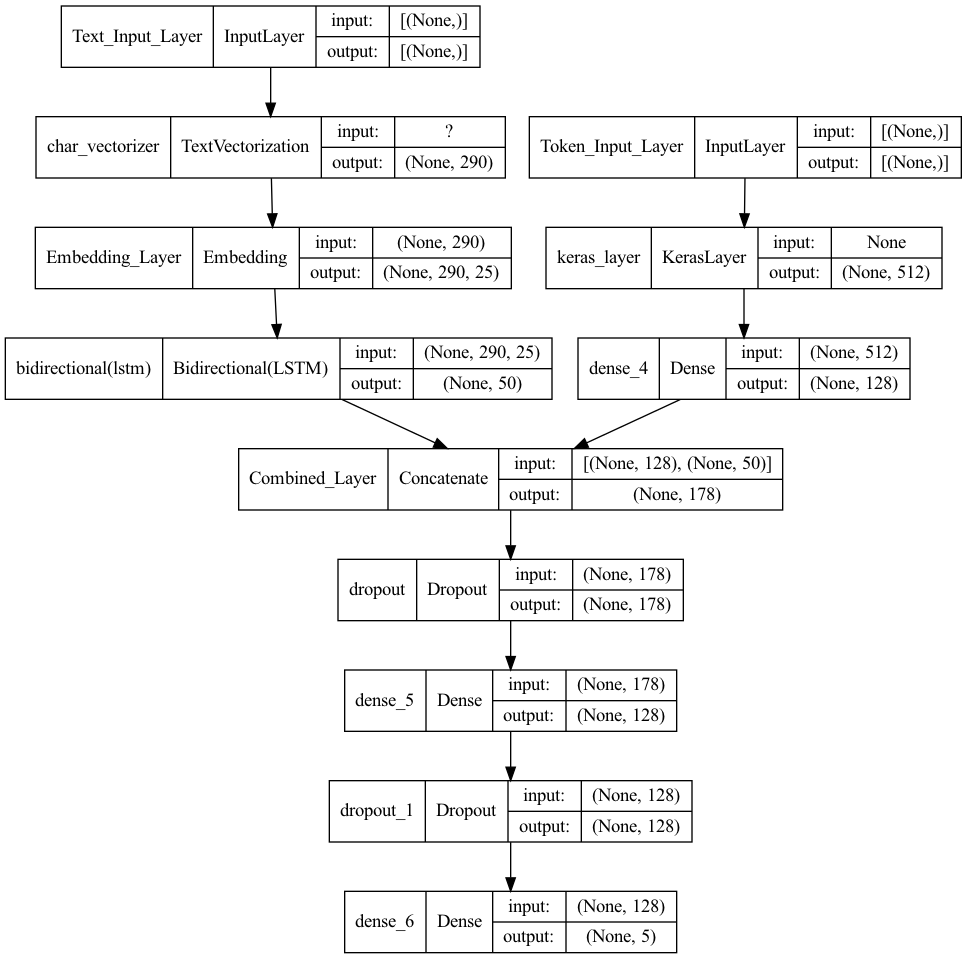

In [58]:
plot_model(combined_model, show_shapes=True)

In [59]:
combined_model.compile(loss='categorical_crossentropy', 
                        optimizer='adam', 
                        metrics = 'accuracy')

#### Combine the datasets as well

In [60]:
training_labels = ohe.transform(training_data['target'].to_numpy().reshape(-1,1))
tf_dataset_combined =  tf.data.Dataset.from_tensor_slices(((training_data['text'],training_data['text_char_level']),   training_labels ))
tf_dataset_combined = tf_dataset_combined.batch(32).prefetch(tf.data.AUTOTUNE) # prefetch and batch data for optimal performance

validation_dataset_labels = ohe.transform(validation_dataset['target'].to_numpy().reshape(-1,1))
tf_valid_combined =  tf.data.Dataset.from_tensor_slices(((validation_dataset['text'],validation_dataset['text_char_level']),   validation_dataset_labels))
tf_valid_combined = tf_valid_combined.batch(32).prefetch(tf.data.AUTOTUNE) # prefetch and batch data for optimal performance


test_data_labels = ohe.transform(test_data['target'].to_numpy().reshape(-1,1))
tf_test_data_combined =  tf.data.Dataset.from_tensor_slices(((test_data['text'],test_data['text_char_level']),  test_data_labels))
tf_test_data_combined = tf_test_data_combined.batch(32).prefetch(tf.data.AUTOTUNE) # prefetch and batch data for optimal performance

In [61]:
combined_model.fit(tf_dataset_combined,steps_per_epoch=len(tf_dataset_combined)* 0.15, validation_data=tf_valid_combined, validation_steps= len(tf_valid_combined) * 0.15, epochs= 3  )

Epoch 1/3


2022-02-09 13:43:16.016078: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-09 13:43:19.136385: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-09 13:43:19.349967: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-09 13:43:21.036886: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-09 13:43:21.204424: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


845/844 [==============================] - ETA: 0s - loss: 0.8292 - accuracy: 0.6821

2022-02-09 13:56:00.741697: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-09 13:56:03.554343: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-09 13:56:03.798125: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


844/844 [==============================] - 959s 1s/step - loss: 0.8292 - accuracy: 0.6821 - val_loss: 0.6308 - val_accuracy: 0.7642
Epoch 2/3
844/844 [==============================] - 3071s 4s/step - loss: 0.6666 - accuracy: 0.7521 - val_loss: 0.5900 - val_accuracy: 0.7790
Epoch 3/3
844/844 [==============================] - 1137s 1s/step - loss: 0.6363 - accuracy: 0.7663 - val_loss: 0.5578 - val_accuracy: 0.7874


In [62]:
performance_measure_classification(tf.argmax(combined_model.predict(tf_test_data_combined), axis=1), y_test, 'Conv1D_Hybrid_Model' )

2022-02-09 15:12:55.615378: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-09 15:12:58.698646: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-09 15:12:58.964709: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


,accuracy,cohen_kappa_score,recall,precision,f1
Conv1D_Hybrid_Model,0.786229,0.711542,0.786229,0.793302,0.788106
